<span style="font-size: 28px;"> __Machine Learning Workshp 4 : The k Nearest Neighbors (kNN) classifier__.</span>
<br>
<br>
<div style="text-align: center;">
<span style="font-size: 22px;"> Welecome to our fourth workshop! </span> </div>
<br>
In this workshop we will investigate the fundamentals of the kNN classifier and then we will enhance its functionality by finding the optimal k value.

<span style="font-size: 36px;">__Table of Contents__</span>
1. [Background: The kNN Classifier](#Background:-The-kNN-Classifier)
1. [Exercise 1: Classification](#Exercise-1:-Classification)
1. [The function make_moons](#The-function-make_moons)
1. [The numpy.meshgrid function](#The-numpy.meshgrid-function)
1. [The numpy.ravel() function](#The-numpy.ravel()-function)
1. [Decision boundary visualization](#Decision-boundary-visualization)
1. [Exercise 2: Nonlinear classification](#Exercise-2:-Nonlinear-classification)
1. [kNN Regression](#kNN-Regression)
1. [Sorting the independent variable](#Sorting-the-independent-variable)
1. [Nonlinear Data Generation Tips](#Nonlinear-Data-Generation-Tips)
1. [k-fold cross validation function](#k-fold-cross-validation-function)
1. [Exercise 3 / Optional](#Exercise-3-/-Optional)
1. [References](#References)
1. [Evaluation](#Evaluation)

# Background: The kNN Classifier
It is a classifier implementing the __k-nearest neighbors__ vote.
Its parameters are:
1. __n-neighbors__: The number of neighbors to use (int). The default value is 5.
1. __weights__: {'uniform','distance'}: When we select 'uniform', all points in each neighborhood are weighted equally. The 'distance' option weights points by the inverse of their distance so that the closer neighbors of a query point will have a greater influence than the ones that are further away.
1. __algorithm__:{'ball_tree','kd_tree','brute','auto'} It is the algorithm used to compute the nearest neighbors. The __auto__ option will attempt to decide the most appropriate algorithm based on the values passed to __fit method__. 

Its attributes are:
1. Class labels known to the classifier: __classes_: array of shape(n_classes)__
1. Number of features seen during fit: __n_features_in: int__
1. Names of features seen during fit: __feature_names_in_: ndarray of shape (n_features_in_)__

Below there is the Python code for a kNN Classification example:
```python
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Generate sample data with 10 instances per class
np.random.seed(0)

classes_ = [0] * 10 + [1] * 10
feature_names_in = ["Feature1", "Feature2"]
features_in = np.array([[1.2, 3.4], [2.3, 4.0], [1.9, 3.6], [4.5, 5.5], [5.0, 6.3],
                       [8.2, 7.4], [7.3, 8.0], [8.9, 7.6], [9.5, 9.5], [10.0, 10.3],
                       [2.5, 2.7], [3.0, 3.5], [3.9, 3.0], [5.5, 6.0], [6.2, 5.8],
                       [7.2, 6.7], [6.5, 7.0], [7.0, 7.2], [6.0, 6.0], [5.2, 5.4]])

# Initialize the kNN classifier with the number of neighbors (k)
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the model using your data
knn.fit(features_in, classes_)

# Example data point for prediction
new_data_point = [[3.1, 4.2]]

# Predict the class for the new data point
predicted_class = knn.predict(new_data_point)

# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(features_in[:10, 0], features_in[:10, 1], c='b', label='Class 0', marker='o')
plt.scatter(features_in[10:, 0], features_in[10:, 1], c='r', label='Class 1', marker='x')
plt.scatter(new_data_point[0][0], new_data_point[0][1], c='g', label='New Data Point', marker='s')
plt.xlabel(feature_names_in[0],fontsize=14)
plt.ylabel(feature_names_in[1], fontsize=14)
plt.grid(True)
plt.legend()
plt.title("kNN Classification with Sample Data")
plt.show()

print("Feature Names:", feature_names_in)
print("New Data Point:", new_data_point[0])
print(f"The predicted class for {new_data_point[0]} is: {predicted_class[0]}")
```


# Exercise 1: Classification
In this assignment we will work with the Iris dataset and we will perform kNN classification as follows:
1. Load the Iris dataset and create the X variable containing the independent variables and the y dataset containing the class label.
1. Extract the independent variables (features) from the Iris dataset and assign them to the sepal length, sepal_width, petal_length and petal_width.
1. Create a scatterplot for sepal length vs, sepal width.
1. Split the data into training and test sets.
1. Scale the features using StandardScaler
1. Perform the kNN classification and report the obtained accuracy for a variety of number of neighbors (e.g. 2-7).
1. Which is the number of neighbours that gave you the best accuracy?

In [9]:
# 1. Load the Iris dataset and create the X variable containing the independent variables and the y dataset containing the class label.
from sklearn import datasets

iris = datasets.load_iris()

X = iris.data
y = iris.target

for i in iris:
    print(i)

data
target
frame
target_names
DESCR
feature_names
filename
data_module


In [3]:
# 2. Extract the independent variables (features) from the Iris dataset and assign them to the sepal length, sepal_width, petal_length and petal_width.
sepal_length = X[:,0]
sepal_width = X[:,1]
petal_length = X[:,2]
petal_width = X[:,3]

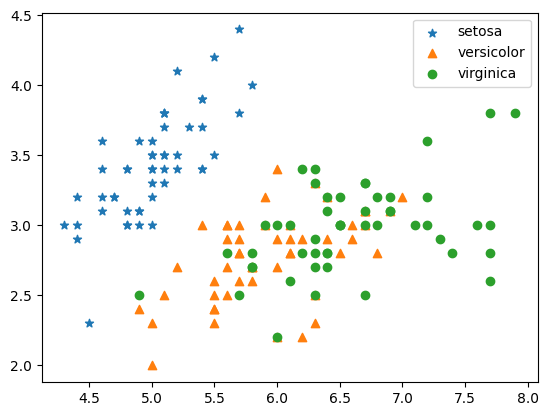

In [15]:
# 3. Create a scatterplot for sepal length vs, sepal width.
import matplotlib.pyplot as plt

for i in range(3):
    plt.scatter(sepal_length[y==i], sepal_width[y==i], label=iris.target_names[i], marker=['*', '^', 'o'][i])

plt.legend()
plt.show()

In [69]:
# 4. Split the data into training and test sets.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [70]:
# 5. Scale the features using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [71]:
# 6. Perform the kNN classification and report the obtained accuracy for a variety of number of neighbors (e.g. 2-7).
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

accuracies = {}

for neighbors in range(2, 8):
    knn = KNeighborsClassifier(n_neighbors=neighbors)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    print('for k =', neighbors, 'accuracy =', accuracy)
    accuracies[neighbors] = accuracy

for k = 2 accuracy = 0.875
for k = 3 accuracy = 0.875
for k = 4 accuracy = 0.9
for k = 5 accuracy = 0.925
for k = 6 accuracy = 0.9
for k = 7 accuracy = 0.9


In [73]:
# 7. Which is the number of neighbours that gave you the best accuracy?
best_accuracy = max(accuracies.values())
best_k_values = [neighbor_count for neighbor_count in accuracies if accuracies[neighbor_count] == best_accuracy]

print('The optimal number(s) of neighbors is:', best_k_values[0])

The optimal number(s) of neighbors is: 5


# The function make_moons
1. It is a simple toy dataset to demonstrate either clustering or classification algorithms.
1. It is a function for making two interleaving half circles.
1. It is particularly useful to deal with __nonlinear decision boundaries__.
<br>
<br>
1. Its __parameters are__:
    1. n_samples: If __int__ the total number of points generated. If two-element tuple, the number of points in each two moons.
    1. shuffle: Whether to __shuffle the samples__ (bool, default=True).
    1. noise: Standard deviation of __Gaussian noise__ added to the data (float, default=None).
    1. random_state (default=None): Determines __random number generation__ for __dataset shuffling and noise__. It passes an __int__ for __reproducible output__ across multiple function calls.
<br>
<br>
1. Its __output__ is:
    1. The generated samples __X__ :ndarray of shape (n_samples,2).
    1. The __integer labels (0 or 1)__ for class membership of each sample __y__: ndarray of shape n_samples.

For example you may call the function as follows:
```python
# Generate synthetic data with a nonlinear decision boundary
X, y = make_moons(n_samples=200, noise=0.3, random_state=42)
```

# The numpy.meshgrid function
1. It returns a __list of coordinate matrices__ from __coordinate vectors__.
1. It is used to __create a rectangular grid__ out of __two given one-dimensional arrays__ representing the Cartesian indexing.
1. If the x-axis ranges from $-x1...x1$ and the y-axis ranges from $-y1...y1$ integer (for simplicity) valuesm then there are a __total__ of $(2*x1+1) * (2*y1+1)$ points marked in the figure each with a X-coordinate and a Y-coordinate.
1. The ```numpy.meshgrid()``` function returns two 2-Dimensional arrays representing the X and Y coordinates of all the points.

The following Python code segment uses the ```numpy.meshgrid``` function to create a grid xith x-values from -3 to 3 and y-values from -5 to 5 with step 0.5:
```python
import numpy as np

# Define the range and step size
x_range = np.arange(-3, 3.5, 0.5)
y_range = np.arange(-5, 5.5, 0.5)

# Create the mesh grid
xx, yy = np.meshgrid(x_range, y_range)

# Print the generated grids
print("xx (X coordinates):\n", xx)
print("\nyy (Y coordinates):\n", yy)

```

# The numpy.ravel() function
1. The ```numpy.ravel()``` function returns a contiguous flattened array.
1. It is an 1-D array with all the inout array elements and with the same type as the input.
1. It is equivalent to ```reshape(-1)```.
1. The following code segment flattens a 2D array to a 1D:
```python
import numpy as np
array=np.arange(15).reshape(3,5)
print(array)
arr1=array.ravel()
print("Flattening array: ",arr1)
```
1. The ```numpy.c_[xx.ravel(),yy.ravel()]``` is a NumPy operation that concatenates the flattened X and Y coordinates into a single 2D array.

# Decision boundary visualization
We use the following code:
```python
plt.contourf(xx, yy, Z, alpha=0.8)
```
1. The ```contourf``` function from ```matplotlib``` is used to create __filled contour plots__.
1. A __filled contour plot__ is a graphical representation of a 3D surface where __regions of different values__ are filled with __different colors__.
1. It is often used in __machine learning__ to __visualize decision boundaries__.
1. The ```xx``` and ```yy``` are the __X__ and __Y__ coordinate grids created by ```np.meshgrid```. So, they __define__ the __grid of points__ in the __2D feature space__, where ```Z``` will be evaluated.
1. ```Z``` is the array of __predicted class labels__, typically generated by a machine learning model, for __each point in the feature space grid__.
1. The ```contourf``` function will use these labels to __determine how to fill different regions__ with colors based on the __class predictions__.
1. The __alpha parameter__ specifies the __opacity of the filled regions__ in the contour plot. It varies between __0 (transparent)__ and __1 (opaque)__.
1. The ```plt.cm``` is an __attribute__ of the ```matplotlib``` library that provides access to a variety of __built-in colormaps__. It is used to __specify the colormap__ you wish to apply to your plot.

# Exercise 2: Nonlinear classification
In this exercise you will use the KNN classifier to find the optimal classification settings for nonlinear classification:
1. Firstly, you will create 200 synthetic instances with a nonlinear decision boundary through the make_moons function. Set the noise parameter (standard deviation of Gaussian noise) at 0.3.
1. Split the data into training and test sets.
1. Initialize variables to store the best k and corresponding accuracy.
1. Define a range of k values to test.
1. For each value within that range, calculate the accuracy on the test set, check if this k value performs the best fit so far and update the best k parameter accordingly.
1. Once you find the optimal parameter, train with that the kNN classifiee.
1. Make predictions on the test data.
1. Calculate accuracy, precision and recall.
1. Visualize the data points with the class information and the decision boundary.
1. Display the evaluation metrics.

In [106]:
# 1. Firstly, you will create 200 synthetic instances with a nonlinear decision boundary through the make_moons function. Set the noise parameter (standard deviation of Gaussian noise) at 0.3.
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=200, noise=0.3, random_state=42)

In [107]:
# 2. Split the data into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [108]:
# 3. Initialize variables to store the best k and corresponding accuracy.
best_k = 0
best_accuracy = 0

In [109]:
# 4. Define a range of k values to test.
k_values = range(3, 20, 2)

In [110]:
# 5. For each value within that range, calculate the accuracy on the test set, check if this k value performs the best fit so far and update the best k parameter accordingly.

for k_value in k_values:
    knn = KNeighborsClassifier(n_neighbors=k_value)
    knn.fit(X_test, y_test)
    
    y_pred = knn.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
        accuracy = best_accuracy
        best_k = k_value

In [111]:
# 6. Once you find the optimal parameter, train with that the kNN classifiee.

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train);

In [112]:
# 7. Make predictions on the test data.
y_pred = knn.predict(X_test)

In [157]:
# 8. Calculate accuracy, precision and recall.
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

Accuracy: 0.9
Precision: 0.8888888888888888
Recall: 0.8888888888888888


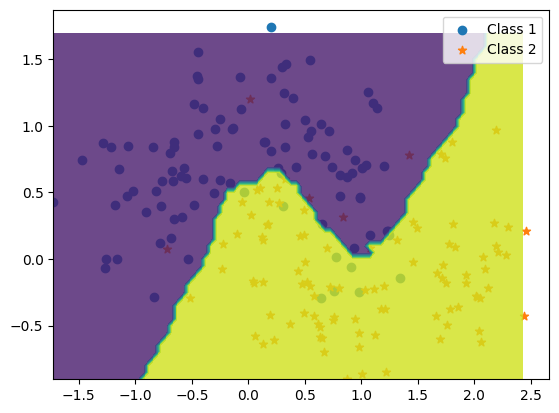

In [158]:
# 9. Visualize the data points with the class information and the decision boundary.
from sklearn.inspection import DecisionBoundaryDisplay
import numpy as np

plt.scatter([item[0] for item, item_class in zip(X, y) if item_class == 0], [item[1] for item, item_class in zip(X, y) if item_class == 0], label='Class 1')
plt.scatter([item[0] for item, item_class in zip(X, y) if item_class == 1], [item[1] for item, item_class in zip(X, y) if item_class == 1], label='Class 2', marker='*')

resolution = 0.05
xx, yy = np.meshgrid(
    np.arange(min([item[0] for item in X]), max([item[0] for item in X]), resolution),
    np.arange(min([item[1] for item in X]), max([item[1] for item in X]), resolution),
)

inputs = np.c_[xx.ravel(),yy.ravel()]

Z = knn.predict(inputs)
Z = Z.reshape(xx.shape)

plt.legend()
plt.contourf(xx, yy, Z, alpha=0.8)
plt.show()

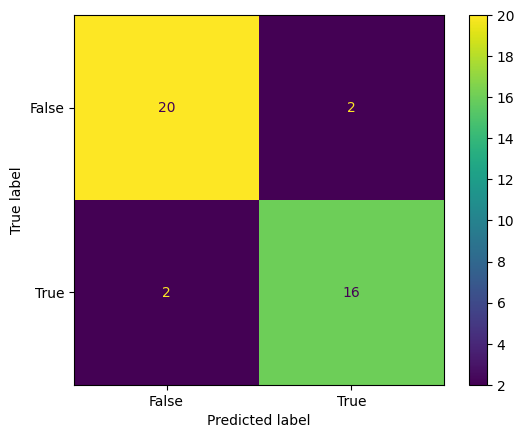

In [161]:
# 10. Display the evaluation metrics.
from sklearn import metrics

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=[False,True])
cm_display.plot();

# kNN Regression
1. We use the __[sklearn.neighbors.KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)__
1. It performs regression analysis based on k-nearest neighbors.
1. The __kNN regression algorithm__ relies on the principle that __similar data points__ should have __similar target values__.
1. It makes predictions by finding the __k nearest data points__ to the __query point__ (the point for which you want to make a prediction).
1. For __regression__, instead of __predicting a class label__, it predicts the __target value__ by taking the __average (simple or weighted)__ of the target values of the __k nearest neighbors__.
1. The __predicted value__ is a __continuous__ number.
1. It is __useful__ in scenarios where the relationship between the input features and the target variable is __not strictly linear__ and can have __complex patterns__.

# Sorting the independent variable
1. We use the sort() function from the Numpy library.
1. Its syntax is ```np.sort(a, axis=-1,kind=None)```
1. It returns a __sorted copy__ of an array.
1. The parameter __a__ denotes the array to be sorted.
1. The optional parameter __axis__ (int/None), denotes the axis along which to sort. If __None__, the array is flattened before sorting. The __default__ is $-1$, which sorts along the last axis.
1. The optional parameter __kind__ {'quicksort','mergesort','heapsort','stable'}, defines the __sorting algorithm__. The 'quicksort' is the __default__ option.
1. The following code segment is used to sort the values in the array ```X``` according to the first axis, effectively sorting the data points based on their __X-coordinate__: 
```python
X = np.sort(5 * np.random.rand(points, 1), axis=0)
```
1. This is __not a strictly necessary procedure__ but it has been done __to ensure that the data points are organized in a predictable way__ (ascending order based on their X-coordinate).

# Nonlinear Data Generation Tips
1. Firstly, we use the ```np.sin(X)``` function to return a NumPy array with a __shape of ```(n,1)```__, where ```n``` is the __number of data points__.
1. This __shape__ represents a __column vector__.
1. However, the ```y``` variable is expected to be a __1D array / flat vector__ with a shape of __```n```__.
1. So, we use the __```ravel()```__ to __flatten__ the output of __```np.sin(x)```__ and __create a 1D array__ that matches the __expected shape__ of the ```y``` variable: 
```python
y=np.sin(X).ravel()+noise
```

# k-fold cross validation function
1. The __```sklearn.model_selection.cross_val_score```__ is used to evaluate a score by cross validation.
1. The __estimator parameter__ (already developed classification/regression model) is the __object__ to use for __data fitting__.
1. The __```X``` parameter__ (array,list) is the __data to fit__.
1. Its __shape__ is __```(n_samples,n_features)```__.
1. The __```y``` parameter__ is the __target variable__ used to __predict__ in the case of __supervised learning__.
1. The __```cv``` parameter defines__ the __cross-validation strategy__. It can be either an __integer__ (e.g. 10) or a __cross-validation object__ ('kFold', 'StratifiedkFold', 'TimeSeriesSplit'). If not specified, a 5-fold cross-validation is used __by default__.
1. The __```scoring``` parameter__ specifies the __scoring metric__ used to __evaluate__ the __model's performance__. It can be a __string__ with the name of a __built-in metric__ or a __custom scoring__ function.
1. The __```cross_val_score```__ function returns an __array of scores__, where each score __corresponds__ to one of the __cross-validation-folds__.
1. You can __compute statistics__ on these scores, such as the __mean score__ or __standard deviation__:
```python
knn_reg = KNeighborsRegressor(n_neighbors=k)
r2_scores = cross_val_score(knn_reg, X_train, y_train, cv=5, scoring='r2')
mean_r2 = np.mean(r2_scores)
    
  if mean_r2 > best_r2:
     best_k = k
     best_r2 = mean_r2
```

# Exercise 3 / Optional
This exercise (optional assignment) is for the interested ones that wish to investigate how the kNN Algorithm can be easily used as a powerful regression algorithm for nonlinear problems. More specifically, please follow these steps:
1. Generate 100 synthetic point data with a nonlinear relationship. The X-cordinates would be among 0-5 and the Y-coordinates would follow the relationship $y=sin(x)+ 0.1*noise$. Use the __```np.sort()```__ and __```np.ravel()```__ for better compliance.
1. __Split__ the data into training and test sets.
1. Perform __linear regression__.
1. Develop a __```for loop```__ to __investigate the optimal k-value__ for the kNN algorithm. The loop should investigate several k value options (e.g. 1-11). The evaluation should be performed according to the __coefficient of determination__.
1. Once you find the best k-value, use it to train the kNN regression algorithm using the __```KNeighborsRegressor```__.
1. Use the __test set__ to __predict the y-values__ for __both algorithms__.
1. __Evaluate both models__ in terms of the __coefficient of determination__.
1. __Generate__ a range (0-5) of X values for the regression lines.
1. __Use__ the previous step to predict the __Y values__ for both regression lines.
1. __Plot__ both __data points__ and __regression lines__.
1. __Display__ in the screen the evaluation metrics and the optimal k-value.

# References
__[Scikit-learn: The kNN Classification](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)__
<br>
__[Scikit-learn User Guide tor Nearest Neighbors](https://scikit-learn.org/stable/modules/neighbors.html)__
<br>
__[The make_moons function](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html)__
<br>
__[Creating 2D grids](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html)__ 
<br>
__[Flattening 2D arrays](https://numpy.org/doc/stable/reference/generated/numpy.ravel.html)__
<br>
__[Visualization of decision boundaries](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contourf.html)__
<br>
__[How to sort data and arrays](https://numpy.org/doc/stable/reference/generated/numpy.sort.html)__
<br>
__[k-fold cross validation function](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)__

# Evaluation

Please visit the following link for __[Workshop 4 Evaluation](https://app.wooclap.com/PIHHOO?from=event-page)__
<br>
Tell us your opinion about this workshop and how we could become better in the next one.
Your opinion matters!!!)__